# Demo 2 - Convolutional Neural Networks usando Keras e CIFAR-10

- Aluno(a): Mayke Kend Gomes Delgado.
- Prof. Ahirton Lopes
- Curso: Pós-Graduação em Ciência de Dados.
- Disciplina: Aprendizagem Profunda(Deep Learning).
- Matrícula: 1691690020

## Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)



***O conjunto de dados é composto por 60.000 fotografias coloridas de 32 × 32 pixels de objetos de 10 classes, como sapos, pássaros, gatos, navios, etc. Os rótulos de classe e seus valores inteiros associados padrão estão listados abaixo. Mais informações em https://www.cs.toronto.edu/~kriz/cifar.html ***

- 0: avião
- 1: automóvel
- 2: pássaro
- 3: gato
- 4: veado
- 5: cachorro
- 6: sapo
- 7: cavalo
- 8: navio
- 9: caminhão

In [1]:
import keras
from keras.datasets import cifar10

# carregando o dataset pré-randomizado de treinamento bem como os dados de teste

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


## Visualizando as primeiras 24 imagens do dataset de treinamento

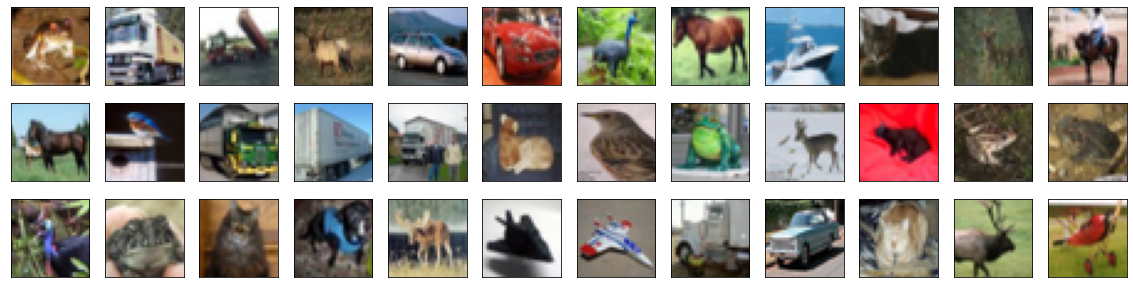

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))


## Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [3]:
# redimensionamento [0,255] --> [0,1]

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Dividindo o dataset em treinamento, teste e validação

In [4]:
from keras.utils import np_utils

# "one-hot encoding" aplicado aos rótulos

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# divindo dataset de treinamento em treinamento, teste e validação

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino

print('formato x_train:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação

print(x_train.shape[0], 'amostras de treinamento')
print(x_test.shape[0], 'amostras de teste')
print(x_valid.shape[0], 'amostras de validação')

formato x_train: (45000, 32, 32, 3)
45000 amostras de treinamento
10000 amostras de teste
5000 amostras de validação


## Definindo a arquitetura do modelo (IMPORTANTE!)

* 3 camadas convolucionais de tamanho progressivamente crescente
* Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
* Uma camada do tipo totalmente conectada de 100 neurônios
* Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
* "Dropout" de 0,2-0,3

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#model = Sequential()
#model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
#                        input_shape=(32, 32, 3)))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.3))
#model.add(Flatten())
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(10, activation='softmax'))

# tentem com outras funções de ativação
# mais informações em https://keras.io/activations/

# define cnn model
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

## Compilando o modelo

Note que no modelo anterior usando optimizer='rmsprop' estava dando cerca de 72 % de acurácia. Então, resolvi usar outro optimizer, visto que usei o modelo **VGG**. Assim, obtendo um resultado satisfatório.

Usei uma taxa de aprendizado de 0,001 e um grande momento de 0,9, sendo que ambos são bons pontos de partida para otimizar nosso modelo. 

O modelo otimizará a função de perda de entropia cruzada categórica necessária para classificação multiclasse e monitorará a precisão da classificação.

In [6]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/

# modelo anterior
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  #metrics=['accuracy'])

# compilando modelo VGG para nosso optimizer=opt
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


## Treinando o modelo

Notei que o modelo estava bastante complexo, após muita pesquisa em fóruns na internet com o intuito de aumentar accuracy do modelo.

Cheguei a uma conclusão, vamos precisaremos adicionar mais camadas de exclusão após cada camada de pooling. 

Com a camada totalmente conectada e usaremos a taxa de exclusão fixa de 20% para obter um resultado mais apurado com 100 epochs e batch_size=64.

Assim, nosso modelo estava passando dos 80% de acurácia.

In [7]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=64, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.78412, saving model to model.weights.best.hdf5
704/704 - 5s - loss: 2.0840 - accuracy: 0.2227 - val_loss: 1.7841 - val_accuracy: 0.3708
Epoch 2/100

Epoch 00002: val_loss improved from 1.78412 to 1.54844, saving model to model.weights.best.hdf5
704/704 - 5s - loss: 1.7268 - accuracy: 0.3592 - val_loss: 1.5484 - val_accuracy: 0.4494
Epoch 3/100

Epoch 00003: val_loss improved from 1.54844 to 1.42276, saving model to model.weights.best.hdf5
704/704 - 5s - loss: 1.5747 - accuracy: 0.4182 - val_loss: 1.4228 - val_accuracy: 0.4860
Epoch 4/100

Epoch 00004: val_loss improved from 1.42276 to 1.37236, saving model to model.weights.best.hdf5
704/704 - 5s - loss: 1.4674 - accuracy: 0.4594 - val_loss: 1.3724 - val_accuracy: 0.5002
Epoch 5/100

Epoch 00005: val_loss improved from 1.37236 to 1.24795, saving model to model.weights.best.hdf5
704/704 - 5s - loss: 1.3845 - accuracy: 0.4960 - val_loss: 1.2480 - val_accuracy: 0.5556
Epoch 6/100

E

## Carregando o modelo com a melhor precisão de validação

In [8]:
# carregando os pesos que geraram a melhor precisão de validação

model.load_weights('model.weights.best.hdf5')

## Cálculo da precisão de classificação no dataset de testes

In [9]:
# avaliando e imprimindo a precisão do teste

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', ' Acuracia de Teste:', score[1])


  Acuracia de Teste: 0.8172000050544739


Neste caso, podemos ver um salto na precisão da classificação em cerca de 10%, de cerca de 72% sem desistência para cerca de 82% com desistência.

## Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [10]:
# obtendo previsões no conjunto de testes

y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

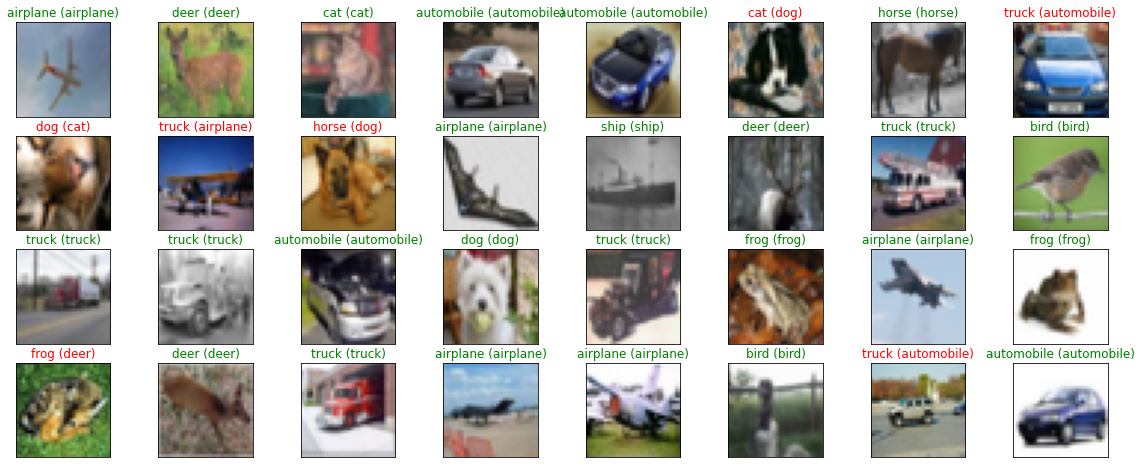

In [11]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    # amostras corretamente classificadas em verde e incorretamente classificadas em vermelho
